In [1]:
import time
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from sklearn_extra.cluster import KMedoids

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
#from konlpy.tag import Komoran

#import pandas_datareader as pdr
from datetime import datetime

from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram 

from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw

import scipy.spatial.distance as ssd

#from gensim.models import Word2Vec as w_to_v

In [2]:
df = pd.read_csv('./df.csv', encoding = 'euc-kr')
df_price = pd.read_pickle('./price_normal.fkl')
df_dtw_matrix = pd.read_pickle('./dtw_matrix.fkl')

df_finance = pd.read_pickle('./financial_i_log_categoric.fkl')
df_price = df_price.dropna(axis = 0)

In [ ]:
# 기업개요

In [3]:
#TFidf 변환 및 KMeans 학습

countvectorizer = CountVectorizer(stop_words=['1월', '1일','2월','3월','4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월', 'M', 'co', 'company', 'global', 'inc', '가능', '가능', '가치', '각종', 
                                              '감소', '강화', '개', '개선', '개시', '개요', '거점', '결과', '결정', '경영', 
                                              '경우', '경쟁력', '계속', '계획', '공시', '과정', '관련', '관리', '구분', 
                                              '구성', '구조', '구축', '국가', '국내', '국내외', '규모', '극대', '글로벌', 
                                              '기간', '기능', '기대', '기록', '기반', '기업', '기존', '기준', '기초',
                                              '기타', '기회', '내용', '노력', '누적', '능력', '다각', '다수', '다양', '다음',
                                              '단계', '단위', '단일', '달성', '담당', '당기', '당사', '대비', '대상', '대응',
                                              '도약', '도입', '동기', '동력', '동사', '동시', '드', '등', '마련', '매출', 
                                              '매출액', '목적', '목표', '및', '바탕', '반기', '반영', '방식', '법인', '변경',
                                              '변동', '변화', '별도', '보수', '보호', '부가', '부문', '부분', '분기', '분류',
                                              '분야', '비용', '비중', '사업', '사업장', '사용', '사항', '상기', '상반기', 
                                              '상승', '상장', '상호', '상황', '선도', '설계', '설립', '설비', '성격', '성장',
                                              '세계', '소유', '수요', '수익', '수준', '수출', '수행', '시작', '시장', '시행',
                                              '실적', '아래', '안정', '업무', '업체', '역량', '역할', '연간', '연결', '영역', 
                                              '영업', '영위', '영향', '예상', '예정', '완료', '요구', '요약', '요인', '우수', 
                                              '우위', '운영', '위주', '위치', '유가증권', '유지', '의', '이상', '이익', '이하', 
                                              '이후', '일반', '일부', '임대', '입지', '자금', '자본', '자산', '자체', '작성', 
                                              '장기', '장벽', '장점', '재무', '적극', '적용', '전개', '전년', '전년 동기', 
                                              '전략', '전망', '전문', '전반', '전체', '점유', '제고', '제외', '제품', '조정', '조직', 
                                              '종속', '종합', '주', '주도', '주력', '주식', '주식회사', '주요', '준비', '중심',
                                              '중요', '증가', '증대', '지배', '지분', '지속', '지역', '지원', '지위', '지주',
                                              '지주회사', '진행', '집중', '차별', '차지', '참고', '참여', '참조', '창출',
                                              '채널', '처리', '체계', '체제', '최고', '최근', '최대', '최소', '최초',
                                              '추가', '추세', '추진', '충족', '투자', '특성', '특수', '특징', '평가',
                                              '포함', '필요', '항목', '해당', '해외', '핵심', '향상', '향후', '현재', '현지',
                                              '현황', '형태', '확대', '확보', '확장', '활동', '활용', '회사', '효율'], 
                                  ngram_range=(1,2), max_df = 0.4, min_df = 0.05, lowercase=True, max_features = 550) #0.4 0.05
tfidftransformer = TfidfTransformer()

data = df["morph_sumdart"].copy()
data_trans = tfidftransformer.fit_transform(countvectorizer.fit_transform(data))

In [4]:
print(data_trans.shape)

(200, 550)


In [ ]:
# elbow

clusters_range = list(range(2, 31))
inertia = []

for i in list(range(2, 31)):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(data_trans)
    inertia.append(kmeans.inertia_)

sns.scatterplot(x=clusters_range, y=inertia)

In [ ]:
# 실루엣
from sklearn.metrics import silhouette_score

k_range = range(2, 15)
best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(data_trans)
    clusters = kmeans.predict(data_trans)
    
    score = silhouette_score(data_trans, clusters)
    print('k :', k, 'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n :', best_n, 'best score :', best_silhouette_score)

In [5]:
# 실제 학습
clst = KMeans(n_clusters=10, random_state=0)
clst.fit(data_trans)


clusters_text = clst.labels_.tolist()

centers_text = clst.cluster_centers_ # cluster의 중심

In [ ]:
clusters_text

In [ ]:
centers_text.shape

In [ ]:
df["cluster"]= clusters_text

df_groupby_cluster = df.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df.groupby('cluster')['labels_kse'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

In [ ]:
# 데이터 프레임 형태로 클러스터 결과 확인

df["cluster"]= clusters_text

df_groupby_cluster = df.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df.groupby('cluster')['name'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

In [ ]:
# 주가변동

In [ ]:
# elbow 

clusters_range = list(range(2, 25))
inertia = []

for i in list(range(2, 25)):
    tskmeans = TimeSeriesKMeans(n_clusters = i, metric='euclidean')
    tskmeans.fit(df_price)
    inertia.append(tskmeans.inertia_)

sns.scatterplot(x=clusters_range, y=inertia)

In [ ]:
from sklearn.metrics import silhouette_score

k_range = range(2, 10)
best_n = -1
best_silhouette_score = -1

for k in k_range:
    stskmeans = TimeSeriesKMeans(n_clusters = k, metric = 'euclidean')
    stskmeans.fit(df_price)
    clusters = stskmeans.labels_
    
    score = silhouette_score(df_price, labels = clusters)
    print('k :', k, 'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n :', best_n, 'best score :', best_silhouette_score)

In [6]:
# 실제 클러스터링
n_clusters = 20
tsclst = TimeSeriesKMeans(n_clusters = n_clusters, metric = 'euclidean') #'euclidean', 'dtw'
tsclst.fit(df_price)

clusters_price = tsclst.labels_.tolist()

centers_price = tsclst.cluster_centers_

In [7]:
centers_price

array([[[-2.00487167],
        [-1.99930583],
        [-2.08793685],
        ...,
        [ 0.33215166],
        [ 0.321145  ],
        [ 0.26723351]],

       [[-1.66812581],
        [-1.43664294],
        [-1.57680767],
        ...,
        [-1.31514249],
        [-1.31277596],
        [-1.3400501 ]],

       [[ 1.1339661 ],
        [ 1.12974615],
        [ 0.98264653],
        ...,
        [-1.02681862],
        [-1.09958062],
        [-1.12975213]],

       ...,

       [[-1.55265765],
        [-1.50916701],
        [-1.6535797 ],
        ...,
        [ 0.93405891],
        [ 1.01102955],
        [ 0.93581265]],

       [[ 1.58856343],
        [ 1.77272677],
        [ 1.42928012],
        ...,
        [-0.65309496],
        [-0.64852549],
        [-0.63713783]],

       [[-0.9785147 ],
        [-0.96392831],
        [-1.19466049],
        ...,
        [-1.26052991],
        [-1.26418665],
        [-1.23622204]]])

In [8]:
centers_price = centers_price.reshape(n_clusters,248)
centers_price

array([[-2.00487167, -1.99930583, -2.08793685, ...,  0.33215166,
         0.321145  ,  0.26723351],
       [-1.66812581, -1.43664294, -1.57680767, ..., -1.31514249,
        -1.31277596, -1.3400501 ],
       [ 1.1339661 ,  1.12974615,  0.98264653, ..., -1.02681862,
        -1.09958062, -1.12975213],
       ...,
       [-1.55265765, -1.50916701, -1.6535797 , ...,  0.93405891,
         1.01102955,  0.93581265],
       [ 1.58856343,  1.77272677,  1.42928012, ..., -0.65309496,
        -0.64852549, -0.63713783],
       [-0.9785147 , -0.96392831, -1.19466049, ..., -1.26052991,
        -1.26418665, -1.23622204]])

In [9]:
# 데이터 프레임 형태로 클러스터 결과 확인

df_price["cluster"]= clusters_price
df_price["name"]= df_price.index

df_groupby_cluster = df_price.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df_price.groupby('cluster')["name"].apply(list)

for i in groupby_list:
    print(i)
    print('\n')
df_price = df_price.drop("name",axis=1, errors = 'ignore')
df_price = df_price.drop("cluster",axis=1, errors = 'ignore')

['NAVER', '기아', '포스코케미칼', '대한항공', 'CJ제일제당', '한국타이어앤테크놀로지', 'LG이노텍', 'GS건설', 'OCI', '한화시스템', '한국항공우주', '한화생명', 'BGF리테일', 'CJ', '포스코인터내셔널', '대우건설', '현대로템', '한화에어로스페이스', '현대위아', 'HDC현대산업개발', 'SK네트웍스', 'CJ CGV', 'LX인터내셔널']


['삼성에스디에스', '한화솔루션', '미래에셋증권', '유한양행', '한미약품', '녹십자', '키움증권', '녹십자홀딩스']


['SK바이오팜', '신풍제약', 'SK케미칼', 'DL', '한올바이오파마', 'SK디스커버리', '영진약품', '삼양식품', '일양약품']


['삼성바이오로직스', '삼성화재', '우리금융지주', '기업은행', '삼성엔지니어링', 'DB손해보험', '삼성증권', '삼성카드', 'NH투자증권', 'BNK금융지주', '현대해상']


['LG화학', '삼성SDI', '현대차', '현대모비스', 'SK이노베이션', 'LG전자', 'SK', '삼성전기', '현대글로비스', '만도', '씨에스윈드', 'DB하이텍', '세방전지', 'SNT모티브']


['LG생활건강', '현대두산인프라코어']


['삼성전자', 'SK하이닉스', '한온시스템', '삼성중공업', 'CJ대한통운', '롯데쇼핑']


['LG', '삼성생명', '아모레퍼시픽', '한국조선해양', 'LG디스플레이', '금호석유', '한국금융지주', '아모레G', 'GS리테일', '하이트진로', '신세계', '현대백화점', '한국앤컴퍼니', '아이에스동서', '신세계인터내셔날', '더블유게임즈', '한국콜마', '보령제약', '동원산업', '쿠쿠홀딩스', '롯데하이마트']


['두산중공업', 'LG유플러스', '코웨이', '제일기획', '한전기술', '대한전선', '한전KPS', '두산', '금호타이어', '쿠쿠홈시스']


['이마트', '두산퓨얼셀', '에스원', 'LS ELECT

In [10]:
# 재무지표
finance_data = df_finance[["PER", "PBR", "PCR", "EV/EBITDA", "Dividend"]]

In [ ]:
# elbow 

clusters_range = list(range(2, 15))
inertia = []

for i in list(range(2, 15)):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(finance_data)
    inertia.append(kmeans.inertia_)

sns.scatterplot(x=clusters_range, y=inertia)

In [ ]:
from sklearn.metrics import silhouette_score

k_range = range(2, 15)
best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(finance_data)
    clusters = kmeans.predict(finance_data)
    
    score = silhouette_score(finance_data, clusters)
    print('k :', k, 'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n :', best_n, 'best score :', best_silhouette_score)

In [11]:
# 실제 클러스터링
finance_data = df_finance[["PER", "PBR", "PCR", "EV/EBITDA", "Dividend"]]
clst = KMeans(n_clusters=5)
clst.fit(finance_data)

clusters_finance = clst.labels_.tolist()

centers_finance = clst.cluster_centers_

In [ ]:
centers_finance

In [ ]:
############## 3번 대안 실행

In [12]:
df_text_result = df.copy()[['name']]
df_text_result['text_clusters'] = clusters_text

df_text_result

,name,text_clusters
0,삼성전자,7
1,SK하이닉스,7
2,NAVER,0
3,삼성바이오로직스,8
4,LG화학,7
...,...,...
195,LX홀딩스,4
196,롯데하이마트,1
197,LX하우시스,4
198,삼양식품,2


In [13]:
centers_text.shape

(10, 550)

In [14]:
df_price_result = pd.DataFrame()
df_price_result['name'] = df_price.index
df_price_result['price_clusters'] = clusters_price
df_price_result

,name,price_clusters
0,삼성전자,6
1,SK하이닉스,6
2,NAVER,0
3,삼성바이오로직스,3
4,LG화학,4
...,...,...
189,현대두산인프라코어,5
190,롯데하이마트,7
191,LX하우시스,19
192,삼양식품,2


In [15]:
centers_price.shape

(20, 248)

In [16]:
df_finance_result = pd.DataFrame()
df_finance_result['name'] = df_finance['name']
df_finance_result['finance_clusters'] = clusters_finance
df_finance_result

,name,finance_clusters
0,삼성전자,4
1,SK하이닉스,4
2,NAVER,1
3,삼성바이오로직스,1
4,LG화학,4
...,...,...
193,현대두산인프라코어,0
194,롯데하이마트,0
195,LX하우시스,0
196,삼양식품,4


In [17]:
centers_finance.shape

(5, 5)

In [18]:
from scipy.spatial import distance_matrix

In [19]:
distance_matrix_text = pd.DataFrame(distance_matrix(centers_text, centers_text))
distance_matrix_text

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.472188,0.549876,0.660371,0.604808,0.612707,0.613227,0.601940,0.710100,0.590347
1,0.472188,0.000000,0.421870,0.611931,0.453208,0.490067,0.477519,0.464760,0.616506,0.441820
2,0.549876,0.421870,0.000000,0.678706,0.569061,0.562239,0.596743,0.596737,0.660370,0.565430
3,0.660371,0.611931,0.678706,0.000000,0.726047,0.728917,0.729461,0.736884,0.804335,0.678438
4,0.604808,0.453208,0.569061,0.726047,0.000000,0.611008,0.598384,0.515562,0.726476,0.554901
5,0.612707,0.490067,0.562239,0.728917,0.611008,0.000000,0.605638,0.640762,0.743594,0.604184
6,0.613227,0.477519,0.596743,0.729461,0.598384,0.605638,0.000000,0.607596,0.736299,0.583269
7,0.601940,0.464760,0.596737,0.736884,0.515562,0.640762,0.607596,0.000000,0.705550,0.597920
8,0.710100,0.616506,0.660370,0.804335,0.726476,0.743594,0.736299,0.705550,0.000000,0.719799
9,0.590347,0.441820,0.565430,0.678438,0.554901,0.604184,0.583269,0.597920,0.719799,0.000000


In [20]:
distance_matrix_price = pd.DataFrame(distance_matrix(centers_price, centers_price))
distance_matrix_price

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,19.580615,27.500811,12.021399,9.059263,20.172977,12.702101,9.820129,11.558209,15.761007,11.569957,9.422549,21.684788,14.202972,23.040474,7.081647,17.854273,7.650527,23.904486,13.556372
1,19.580615,0.000000,14.635626,23.636040,13.008278,14.494787,11.460530,15.530520,23.499813,15.587894,14.108942,22.996053,11.935836,13.293251,8.619436,22.157835,12.628109,22.339441,20.031556,16.862530
2,27.500811,14.635626,0.000000,26.167155,23.606873,18.143975,21.957312,24.300167,26.338727,18.975357,21.540098,27.298994,17.094058,20.845131,11.248831,27.997222,19.128919,27.965495,13.745642,22.175980
3,12.021399,23.636040,26.167155,0.000000,18.020642,22.963622,19.816617,16.577432,7.143661,17.156595,14.892819,7.809274,25.510486,17.328035,25.987980,8.452189,23.349271,8.586843,19.522725,15.389424
4,9.059263,13.008278,23.606873,18.020642,0.000000,17.171259,8.524818,10.328412,17.212160,13.866208,10.634971,15.496106,17.480489,10.900883,17.444633,14.248774,13.774884,14.973427,23.743493,13.878263
5,20.172977,14.494787,18.143975,22.963622,17.171259,0.000000,14.669508,14.662930,20.485092,22.278038,14.149103,24.604749,17.095688,17.600159,15.039458,20.262437,18.181032,20.781351,16.722792,13.093441
6,12.702101,11.460530,21.957312,19.816617,8.524818,14.669508,0.000000,8.958189,19.730674,16.046794,11.069711,18.652617,13.302510,13.193475,14.373369,16.073313,11.373647,16.331593,23.008021,14.496473
7,9.820129,15.530520,24.300167,16.577432,10.328412,14.662930,8.958189,0.000000,15.672421,19.022693,10.155017,16.417332,15.710085,15.071023,18.891146,10.820890,15.102791,10.673553,21.674988,11.191746
8,11.558209,23.499813,26.338727,7.143661,17.212160,20.485092,19.730674,15.672421,0.000000,18.828127,12.788733,10.907076,26.483429,16.984429,25.867301,8.045084,24.059946,9.036286,18.015381,11.969488
9,15.761007,15.587894,18.975357,17.156595,13.866208,22.278038,16.046794,19.022693,18.828127,0.000000,16.565650,14.105833,19.369394,14.010689,16.996491,19.070411,15.077445,19.112412,20.711724,19.954074


In [21]:
distance_matrix_finance = pd.DataFrame(distance_matrix(centers_finance, centers_finance))
distance_matrix_finance

,0,1,2,3,4
0,0.000000,6.974976,9.060419,5.083469,2.689992
1,6.974976,0.000000,14.385248,10.540177,4.706058
2,9.060419,14.385248,0.000000,9.551765,10.510348
3,5.083469,10.540177,9.551765,0.000000,6.795907
4,2.689992,4.706058,10.510348,6.795907,0.000000


In [ ]:
# distance_matrix_text

In [ ]:
# distance_matrix_price

In [ ]:
# distance_matrix_finance

In [22]:
# df_text_result --> 기업개요 클러스터링 결과 200 x 200
# df_price_result --> 주가변동 클러스터링 결과 194 x 194
# df_finance_result --> 재무지표 클러스터링 결과 198 x 198

df_merge_result = pd.merge(df_text_result, df_price_result, left_on='name', right_on='name', how='left')
df_merge_result = pd.merge(df_merge_result, df_finance_result, left_on='name', right_on='name', how='left')
df_merge_result = df_merge_result.fillna(100)
df_merge_result = df_merge_result.astype({'price_clusters':int, 'finance_clusters':int})
df_merge_result

,name,text_clusters,price_clusters,finance_clusters
0,삼성전자,7,6,4
1,SK하이닉스,7,6,4
2,NAVER,0,0,1
3,삼성바이오로직스,8,3,1
4,LG화학,7,4,4
...,...,...,...,...
195,LX홀딩스,4,100,100
196,롯데하이마트,1,7,0
197,LX하우시스,4,19,0
198,삼양식품,2,2,4


In [23]:
df_merge_result[df_merge_result['price_clusters'] == 100]

,name,text_clusters,price_clusters,finance_clusters
10,카카오뱅크,3,100,1
14,크래프톤,0,100,1
22,SK바이오사이언스,8,100,1
29,SK아이이테크놀로지,4,100,1
115,DL이앤씨,6,100,100
195,LX홀딩스,4,100,100


In [24]:
df_dist_text = pd.DataFrame(index = df_merge_result.index, columns = df_merge_result.index)

# df_clusters_result --> 클러스터링 결과 left join으로 합친 것 200 x 200, null 값은 100으로 채움
# normal_dist_text --> text 클러스터링 distance matrix
# normal_dist_price --> 주가 클러스터링 distance matrix

# 거리의 합으로 새로운 200x200 distance matrix 만들어보자

## 가중치

for i in range(len(df_merge_result)):
    for j in range(len(df_merge_result)):
        distance = 0
        try: 
            text_cluster_1 = df_merge_result['text_clusters'][i] # 첫 번째 기업의 개요 클러스터
            text_cluster_2 = df_merge_result['text_clusters'][j] # 두 번째 기업의 개요 클러스터
            distance = distance_matrix_text[text_cluster_1][text_cluster_2] # 개요 클러스터 거리 * weight
        except KeyError:
            print('{}, {}의 text 거리가 계산되지 않습니다.'.format(df_merge_result['name'][i], df_merge_result['name'][j]))
            distance = 0
        
        df_dist_text[i][j] = distance
        

df_dist_text

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,0.60194,0.70555,0.0,0.60194,0.0,0.515562,0.515562,0.70555,...,0.596737,0.596737,0.515562,0.46476,0.59792,0.515562,0.46476,0.515562,0.596737,0.70555
1,0.0,0.0,0.60194,0.70555,0.0,0.60194,0.0,0.515562,0.515562,0.70555,...,0.596737,0.596737,0.515562,0.46476,0.59792,0.515562,0.46476,0.515562,0.596737,0.70555
2,0.60194,0.60194,0.0,0.7101,0.60194,0.0,0.60194,0.604808,0.604808,0.7101,...,0.549876,0.549876,0.604808,0.472188,0.590347,0.604808,0.472188,0.604808,0.549876,0.7101
3,0.70555,0.70555,0.7101,0.0,0.70555,0.7101,0.70555,0.726476,0.726476,0.0,...,0.66037,0.66037,0.726476,0.616506,0.719799,0.726476,0.616506,0.726476,0.66037,0.0
4,0.0,0.0,0.60194,0.70555,0.0,0.60194,0.0,0.515562,0.515562,0.70555,...,0.596737,0.596737,0.515562,0.46476,0.59792,0.515562,0.46476,0.515562,0.596737,0.70555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.515562,0.515562,0.604808,0.726476,0.515562,0.604808,0.515562,0.0,0.0,0.726476,...,0.569061,0.569061,0.0,0.453208,0.554901,0.0,0.453208,0.0,0.569061,0.726476
196,0.46476,0.46476,0.472188,0.616506,0.46476,0.472188,0.46476,0.453208,0.453208,0.616506,...,0.42187,0.42187,0.453208,0.0,0.44182,0.453208,0.0,0.453208,0.42187,0.616506
197,0.515562,0.515562,0.604808,0.726476,0.515562,0.604808,0.515562,0.0,0.0,0.726476,...,0.569061,0.569061,0.0,0.453208,0.554901,0.0,0.453208,0.0,0.569061,0.726476
198,0.596737,0.596737,0.549876,0.66037,0.596737,0.549876,0.596737,0.569061,0.569061,0.66037,...,0.0,0.0,0.569061,0.42187,0.56543,0.569061,0.42187,0.569061,0.0,0.66037


In [25]:
df_dist_price = pd.DataFrame(index = df_merge_result.index, columns = df_merge_result.index)

# df_clusters_result --> 클러스터링 결과 left join으로 합친 것 200 x 200, null 값은 100으로 채움
# normal_dist_text --> text 클러스터링 distance matrix
# normal_dist_price --> 주가 클러스터링 distance matrix

# 거리의 합으로 새로운 200x200 distance matrix 만들어보자

## 가중치

for i in range(len(df_merge_result)):
    for j in range(len(df_merge_result)):
        distance = 0
        try: 
            price_cluster_1 = df_merge_result['price_clusters'][i] # 첫 번째 기업의 개요 클러스터
            price_cluster_2 = df_merge_result['price_clusters'][j] # 두 번째 기업의 개요 클러스터
            distance = distance_matrix_price[price_cluster_1][price_cluster_2] # 개요 클러스터 거리 * weight
        except KeyError:
            print('{}, {}의 price 거리가 계산되지 않습니다.'.format(df_merge_result['name'][i], df_merge_result['name'][j]))
            distance = 0
        
        df_dist_price[i][j] = distance
        

df_dist_price

삼성전자, 카카오뱅크의 price 거리가 계산되지 않습니다.
삼성전자, 크래프톤의 price 거리가 계산되지 않습니다.
삼성전자, SK바이오사이언스의 price 거리가 계산되지 않습니다.
삼성전자, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
삼성전자, DL이앤씨의 price 거리가 계산되지 않습니다.
삼성전자, LX홀딩스의 price 거리가 계산되지 않습니다.
SK하이닉스, 카카오뱅크의 price 거리가 계산되지 않습니다.
SK하이닉스, 크래프톤의 price 거리가 계산되지 않습니다.
SK하이닉스, SK바이오사이언스의 price 거리가 계산되지 않습니다.
SK하이닉스, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
SK하이닉스, DL이앤씨의 price 거리가 계산되지 않습니다.
SK하이닉스, LX홀딩스의 price 거리가 계산되지 않습니다.
NAVER, 카카오뱅크의 price 거리가 계산되지 않습니다.
NAVER, 크래프톤의 price 거리가 계산되지 않습니다.
NAVER, SK바이오사이언스의 price 거리가 계산되지 않습니다.
NAVER, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
NAVER, DL이앤씨의 price 거리가 계산되지 않습니다.
NAVER, LX홀딩스의 price 거리가 계산되지 않습니다.
삼성바이오로직스, 카카오뱅크의 price 거리가 계산되지 않습니다.
삼성바이오로직스, 크래프톤의 price 거리가 계산되지 않습니다.
삼성바이오로직스, SK바이오사이언스의 price 거리가 계산되지 않습니다.
삼성바이오로직스, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
삼성바이오로직스, DL이앤씨의 price 거리가 계산되지 않습니다.
삼성바이오로직스, LX홀딩스의 price 거리가 계산되지 않습니다.
LG화학, 카카오뱅크의 price 거리가 계산되지 않습니다.
LG화학, 크래프톤의 price 거리가 계산되지 않습니다.
LG화학, SK바이오사이언스의 price 거리가 계산되지 않습니다.
LG화학,

카카오뱅크, 삼양홀딩스의 price 거리가 계산되지 않습니다.
카카오뱅크, 영진약품의 price 거리가 계산되지 않습니다.
카카오뱅크, 현대홈쇼핑의 price 거리가 계산되지 않습니다.
카카오뱅크, 동원산업의 price 거리가 계산되지 않습니다.
카카오뱅크, 대상의 price 거리가 계산되지 않습니다.
카카오뱅크, 쿠쿠홀딩스의 price 거리가 계산되지 않습니다.
카카오뱅크, 동원F&B;의 price 거리가 계산되지 않습니다.
카카오뱅크, SNT모티브의 price 거리가 계산되지 않습니다.
카카오뱅크, 넥센타이어의 price 거리가 계산되지 않습니다.
카카오뱅크, 현대두산인프라코어의 price 거리가 계산되지 않습니다.
카카오뱅크, LX홀딩스의 price 거리가 계산되지 않습니다.
카카오뱅크, 롯데하이마트의 price 거리가 계산되지 않습니다.
카카오뱅크, LX하우시스의 price 거리가 계산되지 않습니다.
카카오뱅크, 삼양식품의 price 거리가 계산되지 않습니다.
카카오뱅크, 일양약품의 price 거리가 계산되지 않습니다.
POSCO, 카카오뱅크의 price 거리가 계산되지 않습니다.
POSCO, 크래프톤의 price 거리가 계산되지 않습니다.
POSCO, SK바이오사이언스의 price 거리가 계산되지 않습니다.
POSCO, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
POSCO, DL이앤씨의 price 거리가 계산되지 않습니다.
POSCO, LX홀딩스의 price 거리가 계산되지 않습니다.
현대모비스, 카카오뱅크의 price 거리가 계산되지 않습니다.
현대모비스, 크래프톤의 price 거리가 계산되지 않습니다.
현대모비스, SK바이오사이언스의 price 거리가 계산되지 않습니다.
현대모비스, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
현대모비스, DL이앤씨의 price 거리가 계산되지 않습니다.
현대모비스, LX홀딩스의 price 거리가 계산되지 않습니다.
KB금융, 카카오뱅크의 price 거리가 계산되지 않습니다.
KB금융

SK바이오사이언스, 카카오의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 삼성SDI의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 현대차의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 기아의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 셀트리온의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 카카오뱅크의 price 거리가 계산되지 않습니다.
SK바이오사이언스, POSCO의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 현대모비스의 price 거리가 계산되지 않습니다.
SK바이오사이언스, KB금융의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 크래프톤의 price 거리가 계산되지 않습니다.
SK바이오사이언스, SK이노베이션의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 삼성물산의 price 거리가 계산되지 않습니다.
SK바이오사이언스, SK텔레콤의 price 거리가 계산되지 않습니다.
SK바이오사이언스, LG생활건강의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 신한지주의 price 거리가 계산되지 않습니다.
SK바이오사이언스, LG전자의 price 거리가 계산되지 않습니다.
SK바이오사이언스, SK의 price 거리가 계산되지 않습니다.
SK바이오사이언스, SK바이오사이언스의 price 거리가 계산되지 않습니다.
SK바이오사이언스, LG의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 한국전력의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 삼성생명의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 하나금융지주의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 엔씨소프트의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 하이브의 price 거리가 계산되지 않습니다.
SK바이오사이언스, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 삼성에스디에스의 price 거리가 계산되지 

엔씨소프트, 카카오뱅크의 price 거리가 계산되지 않습니다.
엔씨소프트, 크래프톤의 price 거리가 계산되지 않습니다.
엔씨소프트, SK바이오사이언스의 price 거리가 계산되지 않습니다.
엔씨소프트, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
엔씨소프트, DL이앤씨의 price 거리가 계산되지 않습니다.
엔씨소프트, LX홀딩스의 price 거리가 계산되지 않습니다.
하이브, 카카오뱅크의 price 거리가 계산되지 않습니다.
하이브, 크래프톤의 price 거리가 계산되지 않습니다.
하이브, SK바이오사이언스의 price 거리가 계산되지 않습니다.
하이브, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
하이브, DL이앤씨의 price 거리가 계산되지 않습니다.
하이브, LX홀딩스의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, 삼성전자의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, SK하이닉스의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, NAVER의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, 삼성바이오로직스의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, LG화학의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, 카카오의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, 삼성SDI의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, 현대차의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, 기아의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, 셀트리온의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, 카카오뱅크의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, POSCO의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, 현대모비스의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, KB금융의 price 거리가 계산되지 않습니다.
SK아이이테크놀로지, 크래프톤의 price

HMM, 카카오뱅크의 price 거리가 계산되지 않습니다.
HMM, 크래프톤의 price 거리가 계산되지 않습니다.
HMM, SK바이오사이언스의 price 거리가 계산되지 않습니다.
HMM, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
HMM, DL이앤씨의 price 거리가 계산되지 않습니다.
HMM, LX홀딩스의 price 거리가 계산되지 않습니다.
두산중공업, 카카오뱅크의 price 거리가 계산되지 않습니다.
두산중공업, 크래프톤의 price 거리가 계산되지 않습니다.
두산중공업, SK바이오사이언스의 price 거리가 계산되지 않습니다.
두산중공업, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
두산중공업, DL이앤씨의 price 거리가 계산되지 않습니다.
두산중공업, LX홀딩스의 price 거리가 계산되지 않습니다.
삼성전기, 카카오뱅크의 price 거리가 계산되지 않습니다.
삼성전기, 크래프톤의 price 거리가 계산되지 않습니다.
삼성전기, SK바이오사이언스의 price 거리가 계산되지 않습니다.
삼성전기, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
삼성전기, DL이앤씨의 price 거리가 계산되지 않습니다.
삼성전기, LX홀딩스의 price 거리가 계산되지 않습니다.
삼성화재, 카카오뱅크의 price 거리가 계산되지 않습니다.
삼성화재, 크래프톤의 price 거리가 계산되지 않습니다.
삼성화재, SK바이오사이언스의 price 거리가 계산되지 않습니다.
삼성화재, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
삼성화재, DL이앤씨의 price 거리가 계산되지 않습니다.
삼성화재, LX홀딩스의 price 거리가 계산되지 않습니다.
S-Oil, 카카오뱅크의 price 거리가 계산되지 않습니다.
S-Oil, 크래프톤의 price 거리가 계산되지 않습니다.
S-Oil, SK바이오사이언스의 price 거리가 계산되지 않습니다.
S-Oil, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
S-Oi

삼성증권, LX홀딩스의 price 거리가 계산되지 않습니다.
아모레G, 카카오뱅크의 price 거리가 계산되지 않습니다.
아모레G, 크래프톤의 price 거리가 계산되지 않습니다.
아모레G, SK바이오사이언스의 price 거리가 계산되지 않습니다.
아모레G, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
아모레G, DL이앤씨의 price 거리가 계산되지 않습니다.
아모레G, LX홀딩스의 price 거리가 계산되지 않습니다.
GS, 카카오뱅크의 price 거리가 계산되지 않습니다.
GS, 크래프톤의 price 거리가 계산되지 않습니다.
GS, SK바이오사이언스의 price 거리가 계산되지 않습니다.
GS, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
GS, DL이앤씨의 price 거리가 계산되지 않습니다.
GS, LX홀딩스의 price 거리가 계산되지 않습니다.
삼성카드, 카카오뱅크의 price 거리가 계산되지 않습니다.
삼성카드, 크래프톤의 price 거리가 계산되지 않습니다.
삼성카드, SK바이오사이언스의 price 거리가 계산되지 않습니다.
삼성카드, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
삼성카드, DL이앤씨의 price 거리가 계산되지 않습니다.
삼성카드, LX홀딩스의 price 거리가 계산되지 않습니다.
한국가스공사, 카카오뱅크의 price 거리가 계산되지 않습니다.
한국가스공사, 크래프톤의 price 거리가 계산되지 않습니다.
한국가스공사, SK바이오사이언스의 price 거리가 계산되지 않습니다.
한국가스공사, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
한국가스공사, DL이앤씨의 price 거리가 계산되지 않습니다.
한국가스공사, LX홀딩스의 price 거리가 계산되지 않습니다.
한미사이언스, 카카오뱅크의 price 거리가 계산되지 않습니다.
한미사이언스, 크래프톤의 price 거리가 계산되지 않습니다.
한미사이언스, SK바이오사이언스의 price 거리가 계산되지 않습니다.
한미사이언스,

효성티앤씨, LX홀딩스의 price 거리가 계산되지 않습니다.
현대로템, 카카오뱅크의 price 거리가 계산되지 않습니다.
현대로템, 크래프톤의 price 거리가 계산되지 않습니다.
현대로템, SK바이오사이언스의 price 거리가 계산되지 않습니다.
현대로템, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
현대로템, DL이앤씨의 price 거리가 계산되지 않습니다.
현대로템, LX홀딩스의 price 거리가 계산되지 않습니다.
DL이앤씨, 삼성전자의 price 거리가 계산되지 않습니다.
DL이앤씨, SK하이닉스의 price 거리가 계산되지 않습니다.
DL이앤씨, NAVER의 price 거리가 계산되지 않습니다.
DL이앤씨, 삼성바이오로직스의 price 거리가 계산되지 않습니다.
DL이앤씨, LG화학의 price 거리가 계산되지 않습니다.
DL이앤씨, 카카오의 price 거리가 계산되지 않습니다.
DL이앤씨, 삼성SDI의 price 거리가 계산되지 않습니다.
DL이앤씨, 현대차의 price 거리가 계산되지 않습니다.
DL이앤씨, 기아의 price 거리가 계산되지 않습니다.
DL이앤씨, 셀트리온의 price 거리가 계산되지 않습니다.
DL이앤씨, 카카오뱅크의 price 거리가 계산되지 않습니다.
DL이앤씨, POSCO의 price 거리가 계산되지 않습니다.
DL이앤씨, 현대모비스의 price 거리가 계산되지 않습니다.
DL이앤씨, KB금융의 price 거리가 계산되지 않습니다.
DL이앤씨, 크래프톤의 price 거리가 계산되지 않습니다.
DL이앤씨, SK이노베이션의 price 거리가 계산되지 않습니다.
DL이앤씨, 삼성물산의 price 거리가 계산되지 않습니다.
DL이앤씨, SK텔레콤의 price 거리가 계산되지 않습니다.
DL이앤씨, LG생활건강의 price 거리가 계산되지 않습니다.
DL이앤씨, 신한지주의 price 거리가 계산되지 않습니다.
DL이앤씨, LG전자의 price 거리가 계산되지 않습니다.
DL이앤씨, SK의 price 거리가 계산되지 

한화에어로스페이스, DL이앤씨의 price 거리가 계산되지 않습니다.
한화에어로스페이스, LX홀딩스의 price 거리가 계산되지 않습니다.
휠라홀딩스, 카카오뱅크의 price 거리가 계산되지 않습니다.
휠라홀딩스, 크래프톤의 price 거리가 계산되지 않습니다.
휠라홀딩스, SK바이오사이언스의 price 거리가 계산되지 않습니다.
휠라홀딩스, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
휠라홀딩스, DL이앤씨의 price 거리가 계산되지 않습니다.
휠라홀딩스, LX홀딩스의 price 거리가 계산되지 않습니다.
현대위아, 카카오뱅크의 price 거리가 계산되지 않습니다.
현대위아, 크래프톤의 price 거리가 계산되지 않습니다.
현대위아, SK바이오사이언스의 price 거리가 계산되지 않습니다.
현대위아, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
현대위아, DL이앤씨의 price 거리가 계산되지 않습니다.
현대위아, LX홀딩스의 price 거리가 계산되지 않습니다.
효성, 카카오뱅크의 price 거리가 계산되지 않습니다.
효성, 크래프톤의 price 거리가 계산되지 않습니다.
효성, SK바이오사이언스의 price 거리가 계산되지 않습니다.
효성, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
효성, DL이앤씨의 price 거리가 계산되지 않습니다.
효성, LX홀딩스의 price 거리가 계산되지 않습니다.
SK케미칼, 카카오뱅크의 price 거리가 계산되지 않습니다.
SK케미칼, 크래프톤의 price 거리가 계산되지 않습니다.
SK케미칼, SK바이오사이언스의 price 거리가 계산되지 않습니다.
SK케미칼, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
SK케미칼, DL이앤씨의 price 거리가 계산되지 않습니다.
SK케미칼, LX홀딩스의 price 거리가 계산되지 않습니다.
롯데정밀화학, 카카오뱅크의 price 거리가 계산되지 않습니다.
롯데정밀화학, 크래프톤의 price 거리가 계산되지 않습니다.
롯데정

지누스, LX홀딩스의 price 거리가 계산되지 않습니다.
KG동부제철, 카카오뱅크의 price 거리가 계산되지 않습니다.
KG동부제철, 크래프톤의 price 거리가 계산되지 않습니다.
KG동부제철, SK바이오사이언스의 price 거리가 계산되지 않습니다.
KG동부제철, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
KG동부제철, DL이앤씨의 price 거리가 계산되지 않습니다.
KG동부제철, LX홀딩스의 price 거리가 계산되지 않습니다.
LX인터내셔널, 카카오뱅크의 price 거리가 계산되지 않습니다.
LX인터내셔널, 크래프톤의 price 거리가 계산되지 않습니다.
LX인터내셔널, SK바이오사이언스의 price 거리가 계산되지 않습니다.
LX인터내셔널, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
LX인터내셔널, DL이앤씨의 price 거리가 계산되지 않습니다.
LX인터내셔널, LX홀딩스의 price 거리가 계산되지 않습니다.
한올바이오파마, 카카오뱅크의 price 거리가 계산되지 않습니다.
한올바이오파마, 크래프톤의 price 거리가 계산되지 않습니다.
한올바이오파마, SK바이오사이언스의 price 거리가 계산되지 않습니다.
한올바이오파마, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
한올바이오파마, DL이앤씨의 price 거리가 계산되지 않습니다.
한올바이오파마, LX홀딩스의 price 거리가 계산되지 않습니다.
화승엔터프라이즈, 카카오뱅크의 price 거리가 계산되지 않습니다.
화승엔터프라이즈, 크래프톤의 price 거리가 계산되지 않습니다.
화승엔터프라이즈, SK바이오사이언스의 price 거리가 계산되지 않습니다.
화승엔터프라이즈, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
화승엔터프라이즈, DL이앤씨의 price 거리가 계산되지 않습니다.
화승엔터프라이즈, LX홀딩스의 price 거리가 계산되지 않습니다.
한섬, 카카오뱅크의 price 거리가 계산되지 않습니다.
한섬, 크래프톤의 price

LX홀딩스, 아시아나항공의 price 거리가 계산되지 않습니다.
LX홀딩스, HDC현대산업개발의 price 거리가 계산되지 않습니다.
LX홀딩스, 동원시스템즈의 price 거리가 계산되지 않습니다.
LX홀딩스, F&F;홀딩스의 price 거리가 계산되지 않습니다.
LX홀딩스, 한국앤컴퍼니의 price 거리가 계산되지 않습니다.
LX홀딩스, 대웅제약의 price 거리가 계산되지 않습니다.
LX홀딩스, 동국제강의 price 거리가 계산되지 않습니다.
LX홀딩스, 두산의 price 거리가 계산되지 않습니다.
LX홀딩스, 금호타이어의 price 거리가 계산되지 않습니다.
LX홀딩스, 코스맥스의 price 거리가 계산되지 않습니다.
LX홀딩스, 롯데칠성의 price 거리가 계산되지 않습니다.
LX홀딩스, 롯데관광개발의 price 거리가 계산되지 않습니다.
LX홀딩스, DL의 price 거리가 계산되지 않습니다.
LX홀딩스, 아이에스동서의 price 거리가 계산되지 않습니다.
LX홀딩스, 녹십자홀딩스의 price 거리가 계산되지 않습니다.
LX홀딩스, 종근당의 price 거리가 계산되지 않습니다.
LX홀딩스, 대한유화의 price 거리가 계산되지 않습니다.
LX홀딩스, 영풍의 price 거리가 계산되지 않습니다.
LX홀딩스, SK네트웍스의 price 거리가 계산되지 않습니다.
LX홀딩스, 신세계인터내셔날의 price 거리가 계산되지 않습니다.
LX홀딩스, 더블유게임즈의 price 거리가 계산되지 않습니다.
LX홀딩스, 이노션의 price 거리가 계산되지 않습니다.
LX홀딩스, 태광산업의 price 거리가 계산되지 않습니다.
LX홀딩스, 세방전지의 price 거리가 계산되지 않습니다.
LX홀딩스, CJ CGV의 price 거리가 계산되지 않습니다.
LX홀딩스, 지누스의 price 거리가 계산되지 않습니다.
LX홀딩스, KG동부제철의 price 거리가 계산되지 않습니다.
LX홀딩스, LX인터내셔널의 price 거리가 계산되지 않습니다.
LX홀딩스, 한올바이오파마의 price

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,12.702101,19.816617,8.524818,16.073313,8.524818,8.524818,12.702101,14.373369,...,8.958189,16.331593,8.524818,16.073313,14.669508,0,8.958189,14.496473,21.957312,21.957312
1,0.0,0.0,12.702101,19.816617,8.524818,16.073313,8.524818,8.524818,12.702101,14.373369,...,8.958189,16.331593,8.524818,16.073313,14.669508,0,8.958189,14.496473,21.957312,21.957312
2,12.702101,12.702101,0.0,12.021399,9.059263,7.081647,9.059263,9.059263,0.0,23.040474,...,9.820129,7.650527,9.059263,7.081647,20.172977,0,9.820129,13.556372,27.500811,27.500811
3,19.816617,19.816617,12.021399,0.0,18.020642,8.452189,18.020642,18.020642,12.021399,25.98798,...,16.577432,8.586843,18.020642,8.452189,22.963622,0,16.577432,15.389424,26.167155,26.167155
4,8.524818,8.524818,9.059263,18.020642,0.0,14.248774,0.0,0.0,9.059263,17.444633,...,10.328412,14.973427,0.0,14.248774,17.171259,0,10.328412,13.878263,23.606873,23.606873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,8.958189,8.958189,9.820129,16.577432,10.328412,10.82089,10.328412,10.328412,9.820129,18.891146,...,0.0,10.673553,10.328412,10.82089,14.66293,0,0.0,11.191746,24.300167,24.300167
197,14.496473,14.496473,13.556372,15.389424,13.878263,12.054816,13.878263,13.878263,13.556372,19.275463,...,11.191746,13.49112,13.878263,12.054816,13.093441,0,11.191746,0.0,22.17598,22.17598
198,21.957312,21.957312,27.500811,26.167155,23.606873,27.997222,23.606873,23.606873,27.500811,11.248831,...,24.300167,27.965495,23.606873,27.997222,18.143975,0,24.300167,22.17598,0.0,0.0


In [26]:
df_dist_price

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,12.702101,19.816617,8.524818,16.073313,8.524818,8.524818,12.702101,14.373369,...,8.958189,16.331593,8.524818,16.073313,14.669508,0,8.958189,14.496473,21.957312,21.957312
1,0.0,0.0,12.702101,19.816617,8.524818,16.073313,8.524818,8.524818,12.702101,14.373369,...,8.958189,16.331593,8.524818,16.073313,14.669508,0,8.958189,14.496473,21.957312,21.957312
2,12.702101,12.702101,0.0,12.021399,9.059263,7.081647,9.059263,9.059263,0.0,23.040474,...,9.820129,7.650527,9.059263,7.081647,20.172977,0,9.820129,13.556372,27.500811,27.500811
3,19.816617,19.816617,12.021399,0.0,18.020642,8.452189,18.020642,18.020642,12.021399,25.98798,...,16.577432,8.586843,18.020642,8.452189,22.963622,0,16.577432,15.389424,26.167155,26.167155
4,8.524818,8.524818,9.059263,18.020642,0.0,14.248774,0.0,0.0,9.059263,17.444633,...,10.328412,14.973427,0.0,14.248774,17.171259,0,10.328412,13.878263,23.606873,23.606873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,8.958189,8.958189,9.820129,16.577432,10.328412,10.82089,10.328412,10.328412,9.820129,18.891146,...,0.0,10.673553,10.328412,10.82089,14.66293,0,0.0,11.191746,24.300167,24.300167
197,14.496473,14.496473,13.556372,15.389424,13.878263,12.054816,13.878263,13.878263,13.556372,19.275463,...,11.191746,13.49112,13.878263,12.054816,13.093441,0,11.191746,0.0,22.17598,22.17598
198,21.957312,21.957312,27.500811,26.167155,23.606873,27.997222,23.606873,23.606873,27.500811,11.248831,...,24.300167,27.965495,23.606873,27.997222,18.143975,0,24.300167,22.17598,0.0,0.0


In [27]:
df_dist_finance = pd.DataFrame(index = df_merge_result.index, columns = df_merge_result.index)

# df_clusters_result --> 클러스터링 결과 left join으로 합친 것 200 x 200, null 값은 100으로 채움
# normal_dist_text --> text 클러스터링 distance matrix
# normal_dist_price --> 주가 클러스터링 distance matrix

# 거리의 합으로 새로운 200x200 distance matrix 만들어보자

## 가중치

for i in range(len(df_merge_result)):
    for j in range(len(df_merge_result)):
        distance = 0
        try: 
            finance_cluster_1 = df_merge_result['finance_clusters'][i] # 첫 번째 기업의 개요 클러스터
            finance_cluster_2 = df_merge_result['finance_clusters'][j] # 두 번째 기업의 개요 클러스터
            distance = distance_matrix_finance[finance_cluster_1][finance_cluster_2] # 개요 클러스터 거리 * weight
        except KeyError:
            print('{}, {}의 finance 거리가 계산되지 않습니다.'.format(df_merge_result['name'][i], df_merge_result['name'][j]))
            distance = 0
        
        df_dist_finance[i][j] = distance
        

df_dist_finance

삼성전자, DL이앤씨의 finance 거리가 계산되지 않습니다.
삼성전자, LX홀딩스의 finance 거리가 계산되지 않습니다.
SK하이닉스, DL이앤씨의 finance 거리가 계산되지 않습니다.
SK하이닉스, LX홀딩스의 finance 거리가 계산되지 않습니다.
NAVER, DL이앤씨의 finance 거리가 계산되지 않습니다.
NAVER, LX홀딩스의 finance 거리가 계산되지 않습니다.
삼성바이오로직스, DL이앤씨의 finance 거리가 계산되지 않습니다.
삼성바이오로직스, LX홀딩스의 finance 거리가 계산되지 않습니다.
LG화학, DL이앤씨의 finance 거리가 계산되지 않습니다.
LG화학, LX홀딩스의 finance 거리가 계산되지 않습니다.
카카오, DL이앤씨의 finance 거리가 계산되지 않습니다.
카카오, LX홀딩스의 finance 거리가 계산되지 않습니다.
삼성SDI, DL이앤씨의 finance 거리가 계산되지 않습니다.
삼성SDI, LX홀딩스의 finance 거리가 계산되지 않습니다.
현대차, DL이앤씨의 finance 거리가 계산되지 않습니다.
현대차, LX홀딩스의 finance 거리가 계산되지 않습니다.
기아, DL이앤씨의 finance 거리가 계산되지 않습니다.
기아, LX홀딩스의 finance 거리가 계산되지 않습니다.
셀트리온, DL이앤씨의 finance 거리가 계산되지 않습니다.
셀트리온, LX홀딩스의 finance 거리가 계산되지 않습니다.
카카오뱅크, DL이앤씨의 finance 거리가 계산되지 않습니다.
카카오뱅크, LX홀딩스의 finance 거리가 계산되지 않습니다.
POSCO, DL이앤씨의 finance 거리가 계산되지 않습니다.
POSCO, LX홀딩스의 finance 거리가 계산되지 않습니다.
현대모비스, DL이앤씨의 finance 거리가 계산되지 않습니다.
현대모비스, LX홀딩스의 finance 거리가 계산되지 않습니다.
KB금융, DL이앤씨의 finance 거리가 계산되지 않습니다.
KB금융, LX홀딩스의 f

DL이앤씨, 후성의 finance 거리가 계산되지 않습니다.
DL이앤씨, LS ELECTRIC의 finance 거리가 계산되지 않습니다.
DL이앤씨, 오뚜기의 finance 거리가 계산되지 않습니다.
DL이앤씨, 농심의 finance 거리가 계산되지 않습니다.
DL이앤씨, 아시아나항공의 finance 거리가 계산되지 않습니다.
DL이앤씨, HDC현대산업개발의 finance 거리가 계산되지 않습니다.
DL이앤씨, 동원시스템즈의 finance 거리가 계산되지 않습니다.
DL이앤씨, F&F;홀딩스의 finance 거리가 계산되지 않습니다.
DL이앤씨, 한국앤컴퍼니의 finance 거리가 계산되지 않습니다.
DL이앤씨, 대웅제약의 finance 거리가 계산되지 않습니다.
DL이앤씨, 동국제강의 finance 거리가 계산되지 않습니다.
DL이앤씨, 두산의 finance 거리가 계산되지 않습니다.
DL이앤씨, 금호타이어의 finance 거리가 계산되지 않습니다.
DL이앤씨, 코스맥스의 finance 거리가 계산되지 않습니다.
DL이앤씨, 롯데칠성의 finance 거리가 계산되지 않습니다.
DL이앤씨, 롯데관광개발의 finance 거리가 계산되지 않습니다.
DL이앤씨, DL의 finance 거리가 계산되지 않습니다.
DL이앤씨, 아이에스동서의 finance 거리가 계산되지 않습니다.
DL이앤씨, 녹십자홀딩스의 finance 거리가 계산되지 않습니다.
DL이앤씨, 종근당의 finance 거리가 계산되지 않습니다.
DL이앤씨, 대한유화의 finance 거리가 계산되지 않습니다.
DL이앤씨, 영풍의 finance 거리가 계산되지 않습니다.
DL이앤씨, SK네트웍스의 finance 거리가 계산되지 않습니다.
DL이앤씨, 신세계인터내셔날의 finance 거리가 계산되지 않습니다.
DL이앤씨, 더블유게임즈의 finance 거리가 계산되지 않습니다.
DL이앤씨, 이노션의 finance 거리가 계산되지 않습니다.
DL이앤씨, 태광산업의 finance 거리가 계산되지 않습니다.
DL이앤씨

LX하우시스, LX홀딩스의 finance 거리가 계산되지 않습니다.
삼양식품, DL이앤씨의 finance 거리가 계산되지 않습니다.
삼양식품, LX홀딩스의 finance 거리가 계산되지 않습니다.
일양약품, DL이앤씨의 finance 거리가 계산되지 않습니다.
일양약품, LX홀딩스의 finance 거리가 계산되지 않습니다.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,4.706058,4.706058,0.0,4.706058,0.0,6.795907,0.0,4.706058,...,2.689992,2.689992,2.689992,2.689992,2.689992,0,2.689992,2.689992,0.0,0.0
1,0.0,0.0,4.706058,4.706058,0.0,4.706058,0.0,6.795907,0.0,4.706058,...,2.689992,2.689992,2.689992,2.689992,2.689992,0,2.689992,2.689992,0.0,0.0
2,4.706058,4.706058,0.0,0.0,4.706058,0.0,4.706058,10.540177,4.706058,0.0,...,6.974976,6.974976,6.974976,6.974976,6.974976,0,6.974976,6.974976,4.706058,4.706058
3,4.706058,4.706058,0.0,0.0,4.706058,0.0,4.706058,10.540177,4.706058,0.0,...,6.974976,6.974976,6.974976,6.974976,6.974976,0,6.974976,6.974976,4.706058,4.706058
4,0.0,0.0,4.706058,4.706058,0.0,4.706058,0.0,6.795907,0.0,4.706058,...,2.689992,2.689992,2.689992,2.689992,2.689992,0,2.689992,2.689992,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,2.689992,2.689992,6.974976,6.974976,2.689992,6.974976,2.689992,5.083469,2.689992,6.974976,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.689992,2.689992
197,2.689992,2.689992,6.974976,6.974976,2.689992,6.974976,2.689992,5.083469,2.689992,6.974976,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.689992,2.689992
198,0.0,0.0,4.706058,4.706058,0.0,4.706058,0.0,6.795907,0.0,4.706058,...,2.689992,2.689992,2.689992,2.689992,2.689992,0,2.689992,2.689992,0.0,0.0


In [28]:
df_dist_finance

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,4.706058,4.706058,0.0,4.706058,0.0,6.795907,0.0,4.706058,...,2.689992,2.689992,2.689992,2.689992,2.689992,0,2.689992,2.689992,0.0,0.0
1,0.0,0.0,4.706058,4.706058,0.0,4.706058,0.0,6.795907,0.0,4.706058,...,2.689992,2.689992,2.689992,2.689992,2.689992,0,2.689992,2.689992,0.0,0.0
2,4.706058,4.706058,0.0,0.0,4.706058,0.0,4.706058,10.540177,4.706058,0.0,...,6.974976,6.974976,6.974976,6.974976,6.974976,0,6.974976,6.974976,4.706058,4.706058
3,4.706058,4.706058,0.0,0.0,4.706058,0.0,4.706058,10.540177,4.706058,0.0,...,6.974976,6.974976,6.974976,6.974976,6.974976,0,6.974976,6.974976,4.706058,4.706058
4,0.0,0.0,4.706058,4.706058,0.0,4.706058,0.0,6.795907,0.0,4.706058,...,2.689992,2.689992,2.689992,2.689992,2.689992,0,2.689992,2.689992,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,2.689992,2.689992,6.974976,6.974976,2.689992,6.974976,2.689992,5.083469,2.689992,6.974976,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.689992,2.689992
197,2.689992,2.689992,6.974976,6.974976,2.689992,6.974976,2.689992,5.083469,2.689992,6.974976,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.689992,2.689992
198,0.0,0.0,4.706058,4.706058,0.0,4.706058,0.0,6.795907,0.0,4.706058,...,2.689992,2.689992,2.689992,2.689992,2.689992,0,2.689992,2.689992,0.0,0.0


In [29]:
text_mean = df_dist_text.sum().sum() / (200 * 199)

In [30]:
price_mean = df_dist_price.sum().sum() / (194 * 193)

In [31]:
finance_mean = df_dist_finance.sum().sum() / (198 * 197)

In [32]:
# 10, 14, 22, 29, (115, 195)
list1 = [10, 14, 22, 29, 115, 195]
list2 = [115, 195]
for i in range(200) :
    for j in range(200):
        if i in list1 or j in list1 :
            df_dist_price.iloc[i,j] = price_mean
        if i in list2 or j in list2 :
            df_dist_finance.iloc[i, j] = finance_mean

In [33]:
for i in list1:
    df_dist_price[i][i] = float(0)
df_dist_price

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,12.702101,19.816617,8.524818,16.073313,8.524818,8.524818,12.702101,14.373369,...,8.958189,16.331593,8.524818,16.073313,14.669508,13.836309,8.958189,14.496473,21.957312,21.957312
1,0.0,0.0,12.702101,19.816617,8.524818,16.073313,8.524818,8.524818,12.702101,14.373369,...,8.958189,16.331593,8.524818,16.073313,14.669508,13.836309,8.958189,14.496473,21.957312,21.957312
2,12.702101,12.702101,0.0,12.021399,9.059263,7.081647,9.059263,9.059263,0.0,23.040474,...,9.820129,7.650527,9.059263,7.081647,20.172977,13.836309,9.820129,13.556372,27.500811,27.500811
3,19.816617,19.816617,12.021399,0.0,18.020642,8.452189,18.020642,18.020642,12.021399,25.98798,...,16.577432,8.586843,18.020642,8.452189,22.963622,13.836309,16.577432,15.389424,26.167155,26.167155
4,8.524818,8.524818,9.059263,18.020642,0.0,14.248774,0.0,0.0,9.059263,17.444633,...,10.328412,14.973427,0.0,14.248774,17.171259,13.836309,10.328412,13.878263,23.606873,23.606873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,13.836309,13.836309,13.836309,13.836309,13.836309,13.836309,13.836309,13.836309,13.836309,13.836309,...,13.836309,13.836309,13.836309,13.836309,13.836309,0.0,13.836309,13.836309,13.836309,13.836309
196,8.958189,8.958189,9.820129,16.577432,10.328412,10.82089,10.328412,10.328412,9.820129,18.891146,...,0.0,10.673553,10.328412,10.82089,14.66293,13.836309,0.0,11.191746,24.300167,24.300167
197,14.496473,14.496473,13.556372,15.389424,13.878263,12.054816,13.878263,13.878263,13.556372,19.275463,...,11.191746,13.49112,13.878263,12.054816,13.093441,13.836309,11.191746,0.0,22.17598,22.17598
198,21.957312,21.957312,27.500811,26.167155,23.606873,27.997222,23.606873,23.606873,27.500811,11.248831,...,24.300167,27.965495,23.606873,27.997222,18.143975,13.836309,24.300167,22.17598,0.0,0.0


In [34]:
for i in list2:
    df_dist_finance[i][i] = float(0)
df_dist_finance

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,4.706058,4.706058,0.0,4.706058,0.0,6.795907,0.0,4.706058,...,2.689992,2.689992,2.689992,2.689992,2.689992,3.776949,2.689992,2.689992,0.0,0.0
1,0.0,0.0,4.706058,4.706058,0.0,4.706058,0.0,6.795907,0.0,4.706058,...,2.689992,2.689992,2.689992,2.689992,2.689992,3.776949,2.689992,2.689992,0.0,0.0
2,4.706058,4.706058,0.0,0.0,4.706058,0.0,4.706058,10.540177,4.706058,0.0,...,6.974976,6.974976,6.974976,6.974976,6.974976,3.776949,6.974976,6.974976,4.706058,4.706058
3,4.706058,4.706058,0.0,0.0,4.706058,0.0,4.706058,10.540177,4.706058,0.0,...,6.974976,6.974976,6.974976,6.974976,6.974976,3.776949,6.974976,6.974976,4.706058,4.706058
4,0.0,0.0,4.706058,4.706058,0.0,4.706058,0.0,6.795907,0.0,4.706058,...,2.689992,2.689992,2.689992,2.689992,2.689992,3.776949,2.689992,2.689992,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.776949,3.776949,3.776949,3.776949,3.776949,3.776949,3.776949,3.776949,3.776949,3.776949,...,3.776949,3.776949,3.776949,3.776949,3.776949,0.0,3.776949,3.776949,3.776949,3.776949
196,2.689992,2.689992,6.974976,6.974976,2.689992,6.974976,2.689992,5.083469,2.689992,6.974976,...,0.0,0.0,0.0,0.0,0.0,3.776949,0.0,0.0,2.689992,2.689992
197,2.689992,2.689992,6.974976,6.974976,2.689992,6.974976,2.689992,5.083469,2.689992,6.974976,...,0.0,0.0,0.0,0.0,0.0,3.776949,0.0,0.0,2.689992,2.689992
198,0.0,0.0,4.706058,4.706058,0.0,4.706058,0.0,6.795907,0.0,4.706058,...,2.689992,2.689992,2.689992,2.689992,2.689992,3.776949,2.689992,2.689992,0.0,0.0


In [35]:
# 다시 나누기
ratio_text = 40000 / df_dist_text.sum().sum()

df_dist_text = df_dist_text * ratio_text
df_dist_text

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.141401,1.337866,0.0,1.141401,0.0,0.97761,0.97761,1.337866,...,1.131534,1.131534,0.97761,0.88128,1.133777,0.97761,0.88128,0.97761,1.131534,1.337866
1,0.0,0.0,1.141401,1.337866,0.0,1.141401,0.0,0.97761,0.97761,1.337866,...,1.131534,1.131534,0.97761,0.88128,1.133777,0.97761,0.88128,0.97761,1.131534,1.337866
2,1.141401,1.141401,0.0,1.346493,1.141401,0.0,1.141401,1.146839,1.146839,1.346493,...,1.042677,1.042677,1.146839,0.895365,1.119419,1.146839,0.895365,1.146839,1.042677,1.346493
3,1.337866,1.337866,1.346493,0.0,1.337866,1.346493,1.337866,1.377546,1.377546,0.0,...,1.252196,1.252196,1.377546,1.16902,1.364886,1.377546,1.16902,1.377546,1.252196,0.0
4,0.0,0.0,1.141401,1.337866,0.0,1.141401,0.0,0.97761,0.97761,1.337866,...,1.131534,1.131534,0.97761,0.88128,1.133777,0.97761,0.88128,0.97761,1.131534,1.337866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.97761,0.97761,1.146839,1.377546,0.97761,1.146839,0.97761,0.0,0.0,1.377546,...,1.079056,1.079056,0.0,0.859374,1.052205,0.0,0.859374,0.0,1.079056,1.377546
196,0.88128,0.88128,0.895365,1.16902,0.88128,0.895365,0.88128,0.859374,0.859374,1.16902,...,0.799951,0.799951,0.859374,0.0,0.83778,0.859374,0.0,0.859374,0.799951,1.16902
197,0.97761,0.97761,1.146839,1.377546,0.97761,1.146839,0.97761,0.0,0.0,1.377546,...,1.079056,1.079056,0.0,0.859374,1.052205,0.0,0.859374,0.0,1.079056,1.377546
198,1.131534,1.131534,1.042677,1.252196,1.131534,1.042677,1.131534,1.079056,1.079056,1.252196,...,0.0,0.0,1.079056,0.799951,1.07217,1.079056,0.799951,1.079056,0.0,1.252196


In [36]:
ratio_price = 40000 / df_dist_price.sum().sum()

df_dist_price = df_dist_price * ratio_price
df_dist_price

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,0.92264,1.439416,0.619215,1.167514,0.619215,0.619215,0.92264,1.044035,...,0.650694,1.186275,0.619215,1.167514,1.065546,1.005025,0.650694,1.052977,1.594909,1.594909
1,0.0,0.0,0.92264,1.439416,0.619215,1.167514,0.619215,0.619215,0.92264,1.044035,...,0.650694,1.186275,0.619215,1.167514,1.065546,1.005025,0.650694,1.052977,1.594909,1.594909
2,0.92264,0.92264,0.0,0.873196,0.658036,0.514388,0.658036,0.658036,0.0,1.673586,...,0.713303,0.55571,0.658036,0.514388,1.4653,1.005025,0.713303,0.984691,1.997571,1.997571
3,1.439416,1.439416,0.873196,0.0,1.308962,0.61394,1.308962,1.308962,0.873196,1.887684,...,1.204132,0.623721,1.308962,0.61394,1.668004,1.005025,1.204132,1.117838,1.900698,1.900698
4,0.619215,0.619215,0.658036,1.308962,0.0,1.034985,0.0,0.0,0.658036,1.267122,...,0.750223,1.087622,0.0,1.034985,1.247265,1.005025,0.750223,1.008073,1.714728,1.714728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,...,1.005025,1.005025,1.005025,1.005025,1.005025,0.0,1.005025,1.005025,1.005025,1.005025
196,0.650694,0.650694,0.713303,1.204132,0.750223,0.785995,0.750223,0.750223,0.713303,1.372192,...,0.0,0.775293,0.750223,0.785995,1.065068,1.005025,0.0,0.812933,1.765086,1.765086
197,1.052977,1.052977,0.984691,1.117838,1.008073,0.875623,1.008073,1.008073,0.984691,1.400108,...,0.812933,0.979952,1.008073,0.875623,0.951066,1.005025,0.812933,0.0,1.610792,1.610792
198,1.594909,1.594909,1.997571,1.900698,1.714728,2.033628,1.714728,1.714728,1.997571,0.817079,...,1.765086,2.031324,1.714728,2.033628,1.31792,1.005025,1.765086,1.610792,0.0,0.0


In [37]:
ratio_finance = 40000 / df_dist_finance.sum().sum()

df_dist_finance = df_dist_finance * ratio_finance
df_dist_finance

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.252256,1.252256,0.0,1.252256,0.0,1.808353,0.0,1.252256,...,0.715792,0.715792,0.715792,0.715792,0.715792,1.005025,0.715792,0.715792,0.0,0.0
1,0.0,0.0,1.252256,1.252256,0.0,1.252256,0.0,1.808353,0.0,1.252256,...,0.715792,0.715792,0.715792,0.715792,0.715792,1.005025,0.715792,0.715792,0.0,0.0
2,1.252256,1.252256,0.0,0.0,1.252256,0.0,1.252256,2.804683,1.252256,0.0,...,1.856002,1.856002,1.856002,1.856002,1.856002,1.005025,1.856002,1.856002,1.252256,1.252256
3,1.252256,1.252256,0.0,0.0,1.252256,0.0,1.252256,2.804683,1.252256,0.0,...,1.856002,1.856002,1.856002,1.856002,1.856002,1.005025,1.856002,1.856002,1.252256,1.252256
4,0.0,0.0,1.252256,1.252256,0.0,1.252256,0.0,1.808353,0.0,1.252256,...,0.715792,0.715792,0.715792,0.715792,0.715792,1.005025,0.715792,0.715792,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,1.005025,...,1.005025,1.005025,1.005025,1.005025,1.005025,0.0,1.005025,1.005025,1.005025,1.005025
196,0.715792,0.715792,1.856002,1.856002,0.715792,1.856002,0.715792,1.352683,0.715792,1.856002,...,0.0,0.0,0.0,0.0,0.0,1.005025,0.0,0.0,0.715792,0.715792
197,0.715792,0.715792,1.856002,1.856002,0.715792,1.856002,0.715792,1.352683,0.715792,1.856002,...,0.0,0.0,0.0,0.0,0.0,1.005025,0.0,0.0,0.715792,0.715792
198,0.0,0.0,1.252256,1.252256,0.0,1.252256,0.0,1.808353,0.0,1.252256,...,0.715792,0.715792,0.715792,0.715792,0.715792,1.005025,0.715792,0.715792,0.0,0.0


In [38]:
##################### 벡터화
print(centers_text.shape)
print(centers_price.shape)
print(centers_finance.shape)

(10, 550)
(20, 248)
(5, 5)


In [39]:
centers_text = centers_text * ratio_text
centers_text

array([[0.06624966, 0.        , 0.        , ..., 0.01558675, 0.00347223,
        0.00374893],
       [0.00767257, 0.0167632 , 0.00919844, ..., 0.01623248, 0.02371436,
        0.01765344],
       [0.        , 0.04419889, 0.        , ..., 0.02091049, 0.        ,
        0.01243231],
       ...,
       [0.00684591, 0.00482133, 0.        , ..., 0.00405716, 0.        ,
        0.00699249],
       [0.        , 0.0475913 , 0.        , ..., 0.00280802, 0.        ,
        0.        ],
       [0.00273113, 0.        , 0.00535398, ..., 0.01343927, 0.01617961,
        0.01636284]])

In [40]:
centers_price = centers_price * ratio_price
centers_price

array([[-0.14562745, -0.14522317, -0.15166104, ...,  0.02412643,
         0.02332694,  0.01941099],
       [-0.12116731, -0.10435314, -0.11453426, ..., -0.09552774,
        -0.09535584, -0.09733695],
       [ 0.08236766,  0.08206114,  0.0713763 , ..., -0.07458481,
        -0.07987001, -0.08206157],
       ...,
       [-0.11278008, -0.10962106, -0.12011073, ...,  0.06784705,
         0.07343795,  0.06797443],
       [ 0.11538816,  0.12876519,  0.10381833, ..., -0.04743873,
        -0.04710681, -0.04627965],
       [-0.07107617, -0.07001666, -0.08677631, ..., -0.09156085,
        -0.09182647, -0.08979521]])

In [41]:
centers_finance = centers_finance * ratio_finance
centers_finance

array([[ 4.55161564e-01, -1.57398282e-01,  4.92281859e-01,
         7.23062650e-01,  4.55161564e-01],
       [ 7.34420690e-01,  7.38984683e-01,  1.85507093e+00,
         1.56180703e+00,  4.04463568e-01],
       [ 0.00000000e+00,  3.95862617e-01, -5.39548523e-01,
        -1.28378934e+00,  1.18169675e-16],
       [ 4.58273780e-01, -6.54918133e-02, -7.82592050e-01,
         1.14145014e+00,  3.10443528e-01],
       [ 7.14653673e-01,  2.84869751e-01,  9.25065027e-01,
         8.95806588e-01,  6.34825337e-01]])

In [42]:
# cluster 번호를 각 centroid vector로 치환
rows = []
for i in df_merge_result.index:
    try:
        text_cluster = df_merge_result['text_clusters'][i] # 클러스터 번호
        text_center = centers_text[text_cluster] # 센트로이드 벡터
        
    except IndexError: # 인덱싱이 안되면 평균으로
        text_center = centers_text.mean(axis = 0)
        
    try: 
        price_cluster = df_merge_result['price_clusters'][i]
        price_center = centers_price[price_cluster] # 센트로이드 벡터
        
    except IndexError:
        price_center = centers_price.mean(axis = 0)
        # print(price_center)

    try: 
        finance_cluster = df_merge_result['finance_clusters'][i]
        finance_center = centers_finance[finance_cluster] # 센트로이드 벡터
        
    except IndexError:
        finance_center = centers_finance.mean(axis = 0)
        # print(finance_center)
    

    row = np.concatenate((text_center, price_center, finance_center), axis = 0)
    rows.append(row)
    print(len(row))

803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803
803


In [43]:
df_result_vectors = pd.DataFrame(rows)
df_result_vectors

,0,1,2,3,4,5,6,7,8,9,...,793,794,795,796,797,798,799,800,801,802
0,0.006846,0.004821,0.000000,0.108243,0.000000,0.010698,0.021751,0.000000,0.110832,0.033076,...,-0.085976,-0.081207,-0.081358,-0.084091,-0.087543,0.714654,0.284870,0.925065,0.895807,0.634825
1,0.006846,0.004821,0.000000,0.108243,0.000000,0.010698,0.021751,0.000000,0.110832,0.033076,...,-0.085976,-0.081207,-0.081358,-0.084091,-0.087543,0.714654,0.284870,0.925065,0.895807,0.634825
2,0.066250,0.000000,0.000000,0.000000,0.006773,0.010078,0.006397,0.007417,0.013688,0.000000,...,0.032404,0.032457,0.024126,0.023327,0.019411,0.734421,0.738985,1.855071,1.561807,0.404464
3,0.000000,0.047591,0.000000,0.000000,0.000000,0.000000,0.033204,0.038498,0.000000,0.000000,...,0.110248,0.117342,0.124510,0.130763,0.127460,0.734421,0.738985,1.855071,1.561807,0.404464
4,0.006846,0.004821,0.000000,0.108243,0.000000,0.010698,0.021751,0.000000,0.110832,0.033076,...,-0.021410,-0.017776,-0.022405,-0.023904,-0.026934,0.714654,0.284870,0.925065,0.895807,0.634825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.010758,0.019165,0.000000,0.000000,0.055924,0.016231,0.000000,0.008201,0.000000,...,-0.023159,-0.020110,-0.023071,-0.022736,-0.023668,0.472502,0.239365,0.390055,0.607667,0.360979
196,0.007673,0.016763,0.009198,0.005425,0.045908,0.010834,0.055696,0.058514,0.047532,0.011505,...,-0.045692,-0.046617,-0.049089,-0.042047,-0.048709,0.455162,-0.157398,0.492282,0.723063,0.455162
197,0.000000,0.010758,0.019165,0.000000,0.000000,0.055924,0.016231,0.000000,0.008201,0.000000,...,-0.079913,-0.089299,-0.091561,-0.091826,-0.089795,0.455162,-0.157398,0.492282,0.723063,0.455162
198,0.000000,0.044199,0.000000,0.000000,0.008680,0.007991,0.012309,0.008383,0.006599,0.000000,...,-0.070190,-0.071689,-0.074585,-0.079870,-0.082062,0.714654,0.284870,0.925065,0.895807,0.634825


In [93]:
clst = KMeans(n_clusters = 10)#", metric = 'euclidean', method = 'pam', init = 'k-medoids++', max_iter = 1000"
clst.fit(df_result_vectors)

clusters = clst.labels_.tolist()

centers = clst.cluster_centers_

<IPython.core.display.Javascript object>


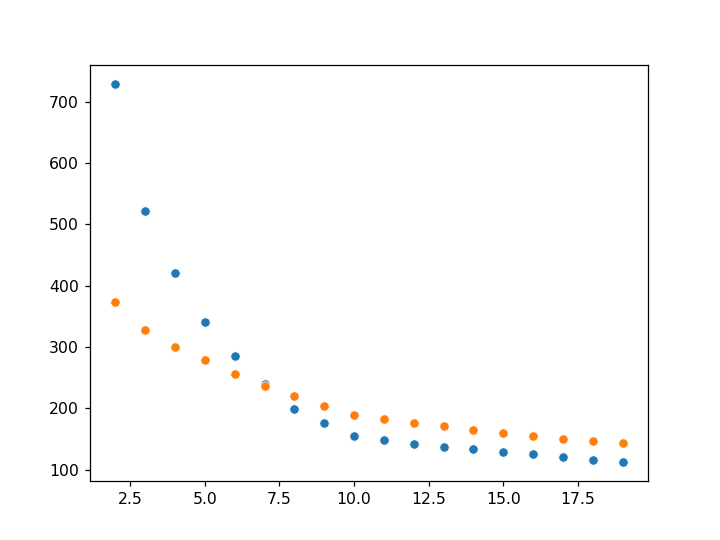

<AxesSubplot:>

In [91]:
# elbow 

clusters_range = list(range(2, 20))
inertia = []

for i in list(range(2, 20)):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_result_vectors)
    inertia.append(kmeans.inertia_)

sns.scatterplot(x=clusters_range, y=inertia)

In [ ]:
from sklearn.metrics import silhouette_score

k_range = range(2, 20)
best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(df_result_vectors)
    clusters = kmeans.predict(df_result_vectors)
    
    score = silhouette_score(df_result_vectors, clusters)
    print('k :', k, 'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n :', best_n, 'best score :', best_silhouette_score)

<IPython.core.display.Javascript object>


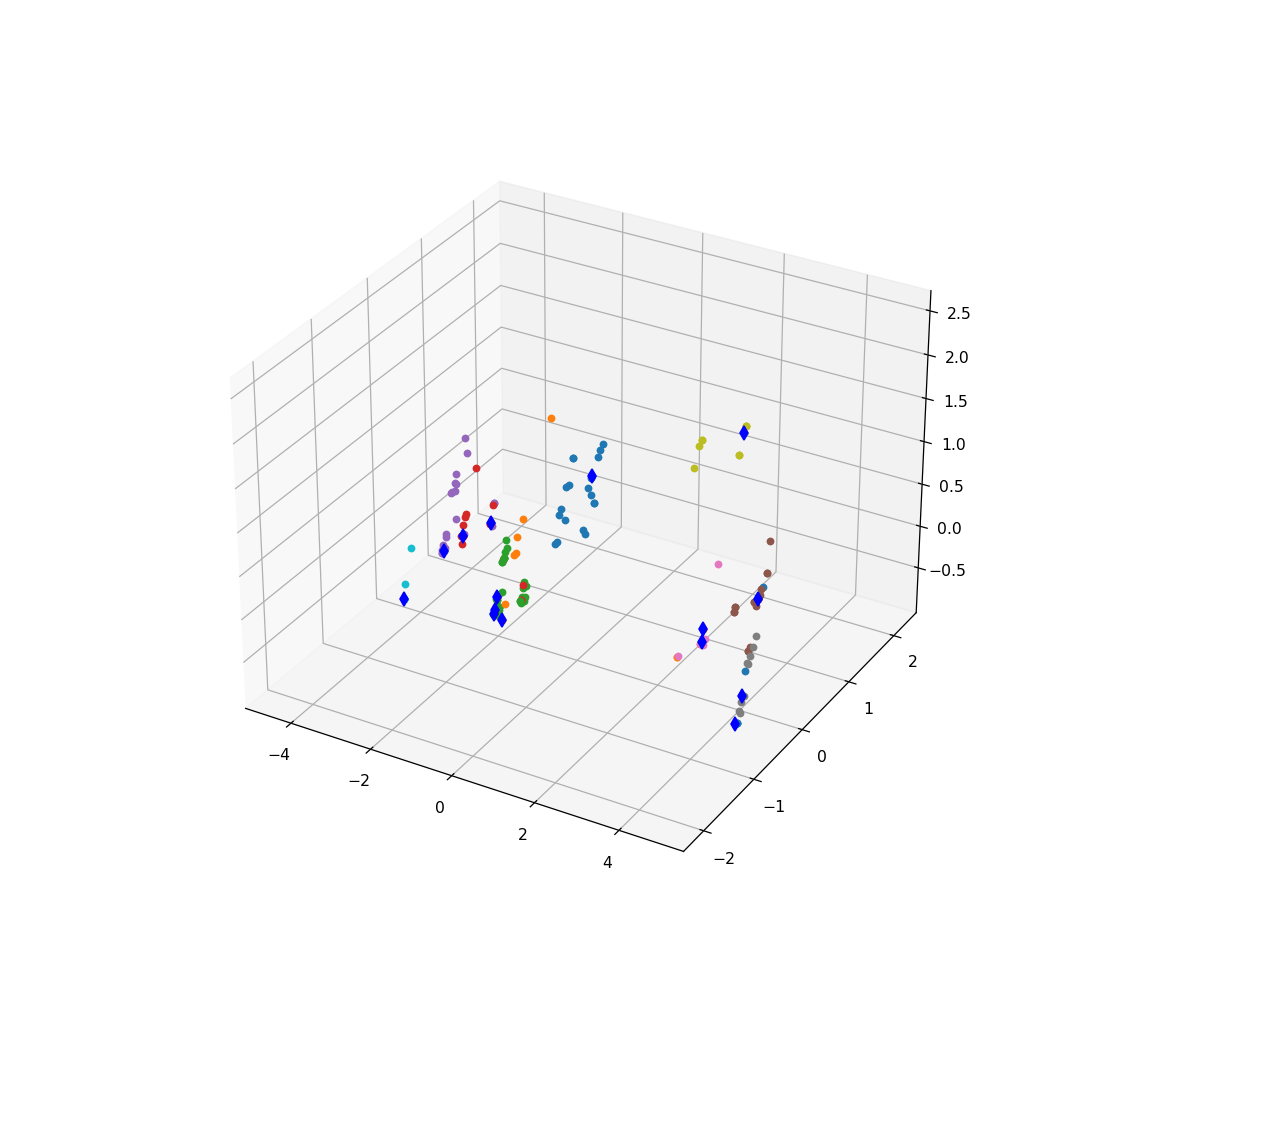

In [81]:
# PCA 차원 축소
%matplotlib notebook
using_pca = PCA(n_components=3)
using_pca.fit(df_result_vectors)
pca= using_pca.transform(df_result_vectors)
centers_trans= using_pca.transform(centers)

xs, ys, zs = pca[:, 0], pca[:, 1], pca[:, 2]

df_plot = pd.DataFrame(dict(x=xs, y=ys, z=zs, label=clusters))
groups = df_plot.groupby('label')


fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.margins(0.05)
colors = {0:'r', 1: 'b', 2: 'k', 3: 'm', 4: 'c', 5: 'g', 6: 'w'}
for idx, group in groups:
    ax.plot(group.x, group.y, group.z ,marker='o', linestyle='', ms=5, mec='none')
    ax.set_aspect('auto')
    ax.tick_params(        axis= 'x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off')
    ax.tick_params(        axis= 'y',
        which='both',
        left='off',
        top='off',
        labelleft='off')
    ax.tick_params(        axis= 'z',
        which='both',
        left='off',
        top='off',
        labelleft='off')



ax.plot(centers_trans[:,0],centers_trans[:,1],centers_trans[:,2], c='b', zorder=100, marker='d', linestyle='')
plt.show()

<IPython.core.display.Javascript object>


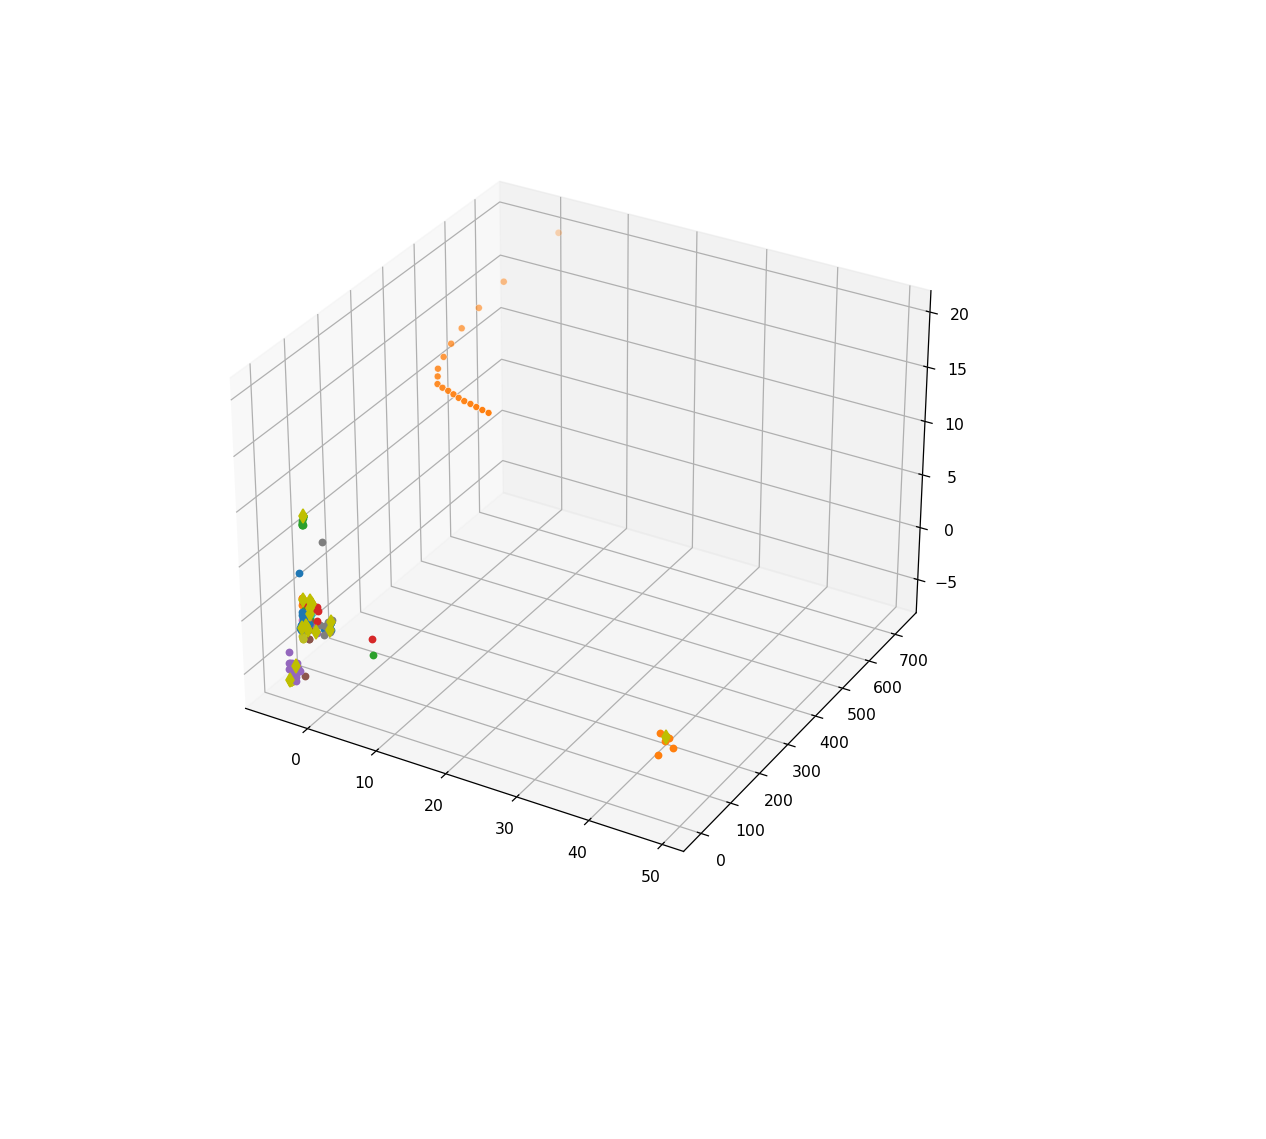

In [82]:
#LDA 차원축소
lda = LinearDiscriminantAnalysis(n_components=3)

#학습
lda.fit(df_result_vectors, clusters)
#변형
data_lda = lda.transform(df_result_vectors)
centers_trans= lda.transform(centers)

#DataFrame 생성
lda_columns=['lda_component_1','lda_component_2','lda_component_3']
DF_lda = pd.DataFrame(data_lda, columns=lda_columns)
DF_lda['target']=clusters


#축 지정
xs, ys, zs = data_lda[:, 0], data_lda[:, 1], data_lda[:, 2]

df_plot = pd.DataFrame(dict(x=xs, y=ys, z=zs, label=clusters))
groups = df_plot.groupby('label')

markers=['^', 's', 'o','d','*']
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.margins(0.05)
colors = {0:'r', 1: 'b', 2: 'k', 3: 'm', 4: 'c', 5: 'g', 6: 'w'}
for idx, group in groups:
    ax.plot(group.x, group.y, group.z ,marker='o', linestyle='', ms=5, mec='none' )
    ax.set_aspect('auto')
    ax.tick_params(        axis= 'x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off')
    ax.tick_params(        axis= 'y',
        which='both',
        left='off',
        top='off',
        labelleft='off')
    ax.tick_params(        axis= 'z',
        which='both',
        left='off',
        top='off',
        labelleft='off')



ax.plot(centers_trans[:,0],centers_trans[:,1],centers_trans[:,2], c='y', zorder=100, marker='d', linestyle='')
plt.show()



In [94]:
# 데이터 프레임 형태로 클러스터 결과 확인

df["cluster"]= clusters

df_groupby_cluster = df.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df.groupby('cluster')['name'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

['삼성물산', 'LG생활건강', 'LG', '넷마블', '아모레퍼시픽', '금호석유', '아모레G', '하이트진로', '신세계', '휠라홀딩스', '농심', '코스맥스', '신세계인터내셔날', '더블유게임즈', '이노션', '한국콜마', '쿠쿠홈시스', '보령제약', '한세실업', '대상', '쿠쿠홀딩스']


['POSCO', 'SK텔레콤', '한국전력', 'HMM', '두산중공업', '대한항공', 'KT', 'LG유플러스', 'LG디스플레이', 'CJ제일제당', '현대제철', '현대건설', '한국타이어앤테크놀로지', '현대중공업지주', 'GS', '한국가스공사', '쌍용C&E;', '두산밥캣', 'GS건설', '롯데지주', 'GS리테일', '팬오션', '한화시스템', '한국항공우주', 'BGF리테일', 'CJ', '제일기획', '포스코인터내셔널', '대우건설', '효성티앤씨', '현대로템', 'DL이앤씨', '현대미포조선', '한화', '한화에어로스페이스', '영원무역', '현대엘리베이', '한전KPS', '현대백화점', '한국앤컴퍼니', '동국제강', '금호타이어', '롯데칠성', '영풍', '태광산업', 'LX인터내셔널', '화승엔터프라이즈', '한섬', '오리온홀딩스', '풍산', '현대그린푸드', '삼양홀딩스', '현대홈쇼핑', '동원산업', '동원F&B;', '넥센타이어', '롯데하이마트']


['셀트리온', '유한양행', '한미약품', '녹십자', '신풍제약', 'SK케미칼', '종근당', '한올바이오파마', '부광약품', '영진약품', '일양약품']


['NAVER', '삼성바이오로직스', '카카오', '카카오뱅크', '크래프톤', 'SK바이오사이언스', '하이브', 'SK아이이테크놀로지', '포스코케미칼', '삼성엔지니어링', '일진머티리얼즈', '한미사이언스', '동서', '씨에스윈드', '한전기술', '대한전선', '후성', '지누스']


['SK이노베이션', 'S-Oil', 'SK바이오팜', '강원랜드', '한진칼', '삼성중공업

In [95]:
# 데이터 프레임 형태로 클러스터 결과 확인

df["cluster"]= clusters

df_groupby_cluster = df.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df.groupby('cluster')['labels_kse'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')


['유통업', '화학', '금융업', '서비스업', '화학', '화학', '화학', '음식료품', '유통업', '유통업', '음식료품', '화학', '유통업', '서비스업', '서비스업', '화학', '서비스업', '의약품', '섬유,의복', '음식료품', '금융업']


['철강및금속', '통신업', '전기가스업', '운수창고', '기계', '운수창고', '통신업', '통신업', '전기,전자', '음식료품', '철강및금속', '건설업', '화학', '화학', '금융업', '전기가스업', '비금속광물', '기계', '건설업', '금융업', '유통업', '운수창고', '전기,전자', '운수장비', '유통업', '금융업', '서비스업', '유통업', '건설업', '화학', '운수장비', '건설업', '운수장비', '화학', '운수장비', '유통업', '기계', '건설업', '유통업', '금융업', '철강및금속', '화학', '음식료품', '철강및금속', '화학', '유통업', '제조업', '섬유,의복', '금융업', '철강및금속', '유통업', '금융업', '유통업', nan, '음식료품', '화학', '유통업']


['의약품', '의약품', '의약품', '의약품', '의약품', '화학', '의약품', '의약품', '의약품', '의약품', '의약품']


['서비스업', '의약품', '서비스업', '은행', '서비스업', '의약품', '서비스업', '전기,전자', '비금속광물', '서비스업', '전기,전자', '금융업', '유통업', '기계', '서비스업', '전기,전자', '화학', '제조업']


['화학', '화학', '서비스업', '서비스업', '운수창고', '운수장비', '서비스업', '서비스업', '서비스업']


['보험', '보험', '금융업', '보험', '증권', '증권', '증권', '보험', '보험']


['운수장비', '금융업', '금융업', '금융업', '은행', '운수장비', '금융업', '금융업', '유통업', '전기,전자', '화

In [ ]:
########################################################################

In [101]:
weight_text = 4
weight_price = 5
weight_finance = 3
df_dist_new = df_dist_text*weight_text + df_dist_finance*weight_finance + df_dist_price*weight_price
df_dist_new

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,12.935573,16.305311,3.096077,14.159943,3.096077,12.431577,8.52364,14.32841,...,9.926983,12.604885,9.153893,11.510066,12.010215,11.950642,8.925967,11.322703,12.500681,13.326009
1,0.0,0.0,12.935573,16.305311,3.096077,14.159943,3.096077,12.431577,8.52364,14.32841,...,9.926983,12.604885,9.153893,11.510066,12.010215,11.950642,8.925967,11.322703,12.500681,13.326009
2,12.935573,12.935573,0.0,9.751952,11.612552,2.571941,11.612552,16.291583,8.344123,13.753904,...,13.30523,12.517265,13.445541,11.721408,17.372183,12.627556,12.71598,15.078819,17.915332,19.130595
3,16.305311,16.305311,9.751952,0.0,15.653042,8.455672,15.653042,20.46904,13.632932,9.438418,...,16.597451,13.695397,17.622999,13.313789,19.367569,13.550385,16.264747,16.667383,18.269045,13.260259
4,3.096077,3.096077,11.612552,15.653042,0.0,13.4973,0.0,9.3355,7.20062,15.443845,...,10.424626,12.111621,6.057816,10.847422,12.918811,11.950642,9.42361,11.098179,13.099775,13.925103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,11.950642,11.950642,12.627556,13.550385,11.950642,12.627556,11.950642,8.040201,8.040201,13.550385,...,12.356425,12.356425,8.040201,11.477696,12.249021,0.0,11.477696,8.040201,12.356425,13.550385
196,8.925967,8.925967,12.71598,16.264747,9.42361,13.079441,9.42361,11.246658,9.151384,17.10505,...,3.199803,7.076266,7.188609,3.929974,8.676461,11.477696,0.0,7.502158,14.17261,15.648889
197,11.322703,11.322703,15.078819,16.667383,11.098179,14.533478,11.098179,9.098412,7.070833,18.07873,...,8.380887,9.215982,5.040363,7.815611,8.964147,8.040201,7.502158,0.0,14.51756,15.71152
198,12.500681,12.500681,17.915332,18.269045,13.099775,18.09562,13.099775,18.314921,14.304078,12.850949,...,10.972807,12.303995,15.037237,15.515321,13.025655,12.356425,14.17261,14.51756,0.0,5.008786


In [102]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters = 10, metric = 'precomputed', method = 'pam', init = 'k-medoids++', max_iter = 10000)

In [103]:
kmedoids.fit(df_dist_new)

KMedoids(init='k-medoids++', max_iter=10000, method='pam', metric='precomputed',
         n_clusters=10)

<IPython.core.display.Javascript object>


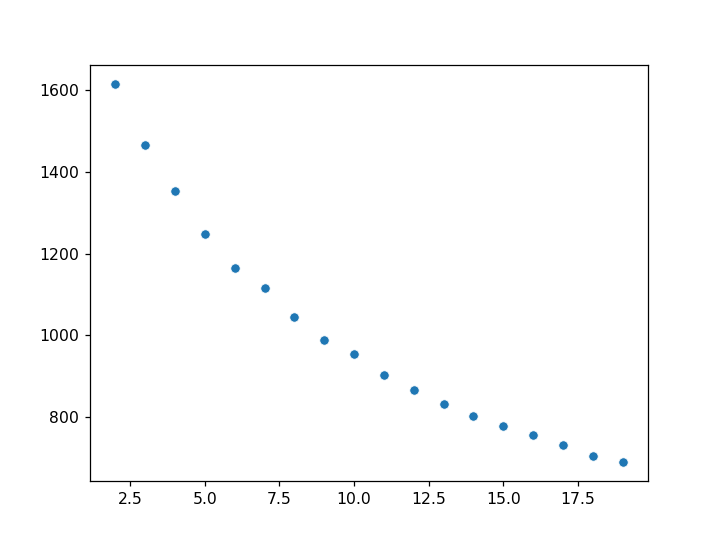

<AxesSubplot:>

In [104]:
# elbow 

clusters_range = list(range(2, 20))
inertia = []

for i in list(range(2, 20)):
    kmeans = KMedoids(n_clusters = i, metric = 'precomputed', method = 'pam', init = 'k-medoids++', max_iter = 300)
    kmeans.fit(df_dist_new)
    inertia.append(kmeans.inertia_)

sns.scatterplot(x=clusters_range, y=inertia)

In [105]:
kmedoids_clusters = kmedoids.labels_
kmedoids_clusters

array([6, 6, 8, 9, 2, 8, 2, 2, 2, 3, 9, 0, 2, 4, 8, 1, 5, 8, 5, 4, 2, 2,
       3, 5, 0, 5, 4, 8, 8, 2, 2, 8, 9, 2, 4, 1, 6, 5, 8, 5, 6, 7, 4, 4,
       8, 7, 2, 2, 3, 0, 6, 8, 2, 0, 1, 2, 7, 7, 0, 2, 5, 7, 9, 5, 0, 4,
       9, 4, 2, 7, 3, 4, 5, 7, 4, 6, 9, 6, 8, 0, 1, 1, 4, 7, 7, 7, 7, 7,
       4, 4, 3, 8, 7, 6, 8, 3, 8, 6, 5, 3, 7, 7, 7, 4, 2, 7, 9, 7, 4, 8,
       7, 7, 6, 0, 7, 9, 7, 4, 5, 7, 9, 4, 5, 6, 2, 0, 5, 2, 6, 3, 6, 7,
       0, 8, 9, 9, 0, 3, 6, 7, 5, 5, 4, 7, 6, 5, 7, 3, 0, 6, 7, 5, 0, 1,
       3, 5, 2, 3, 7, 6, 7, 5, 8, 8, 8, 2, 1, 5, 8, 7, 3, 0, 0, 5, 6, 0,
       1, 8, 5, 5, 5, 3, 0, 0, 3, 0, 3, 0, 5, 5, 5, 0, 2, 7, 0, 2, 7, 2,
       3, 3], dtype=int64)

In [106]:
kmedoids_med = kmedoids.medoid_indices_
kmedoids_med

array([185,  35, 104, 129,  74,  39,  50,  61,  17, 120])

In [110]:
df_merge_result["merge_clusters"]= kmedoids_clusters

df_groupby_cluster = df_merge_result.groupby('merge_clusters')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df_merge_result.groupby('merge_clusters')['name'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

['POSCO', '한국전력', '한국조선해양', 'LG디스플레이', '현대건설', '현대중공업지주', '두산밥캣', '효성티앤씨', '한화에어로스페이스', '영원무역', '현대백화점', '동국제강', '롯데칠성', '화승엔터프라이즈', '한섬', '오리온홀딩스', '풍산', '현대그린푸드', '삼양홀딩스', '현대홈쇼핑', '동원F&B;', '현대두산인프라코어']


['SK이노베이션', 'S-Oil', '강원랜드', '한진칼', '삼성중공업', '롯데관광개발', 'CJ CGV', 'GKL']


['LG화학', '삼성SDI', '현대차', '기아', '현대모비스', 'LG전자', 'SK', 'SK아이이테크놀로지', '삼성에스디에스', '삼성전기', '롯데케미칼', '한온시스템', '현대글로비스', '코웨이', '미래에셋증권', 'LG이노텍', '만도', 'DB하이텍', '현대위아', '녹십자홀딩스', '세방전지', 'SNT모티브', 'LX홀딩스', 'LX하우시스']


['셀트리온', 'SK바이오사이언스', 'SK바이오팜', '유한양행', '한미약품', '녹십자', '신풍제약', 'SK케미칼', '대웅', '대웅제약', 'DL', '종근당', '한올바이오파마', '부광약품', 'SK디스커버리', '영진약품', '삼양식품', '일양약품']


['KB금융', '신한지주', '하나금융지주', '삼성화재', '우리금융지주', '기업은행', '한국금융지주', 'DB손해보험', '삼성증권', '삼성카드', 'NH투자증권', '메리츠증권', '두산퓨얼셀', 'BNK금융지주', '키움증권', '현대해상', '대우조선해양', '아시아나항공']


['삼성물산', 'LG생활건강', 'LG', '삼성생명', 'KT&G;', '아모레퍼시픽', '금호석유', '오리온', '아모레G', '동서', '하이트진로', '신세계', '휠라홀딩스', '오뚜기', '농심', 'F&F;홀딩스', '코스맥스', '아이에스동서', '신세계인터내셔날', '지누스', '한국콜마', '쿠쿠홈시스', 

In [111]:
df_join = pd.merge(df, df_merge_result[['name', 'merge_clusters']], left_on='name', right_on='name', how='inner')

df_groupby_cluster = df_join.groupby('merge_clusters')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df_join.groupby('merge_clusters')['labels_kse'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

['철강및금속', '전기가스업', '운수장비', '전기,전자', '건설업', '화학', '기계', '화학', '운수장비', '유통업', '유통업', '철강및금속', '음식료품', '제조업', '섬유,의복', '금융업', '철강및금속', '유통업', '금융업', '유통업', '음식료품', '기계']


['화학', '화학', '서비스업', '운수창고', '운수장비', '서비스업', '서비스업', '서비스업']


['화학', '전기,전자', '운수장비', '운수장비', '운수장비', '전기,전자', '금융업', '전기,전자', '서비스업', '전기,전자', '화학', '기계', '운수창고', '서비스업', '증권', '전기,전자', '운수장비', '전기,전자', '운수장비', '서비스업', '전기,전자', '운수장비', '금융업', '화학']


['의약품', '의약품', '서비스업', '의약품', '의약품', '의약품', '의약품', '화학', '금융업', '의약품', '금융업', '의약품', '의약품', '의약품', '금융업', '의약품', '음식료품', '의약품']


['금융업', '금융업', '금융업', '보험', '금융업', '은행', '금융업', '보험', '증권', '금융업', '증권', '증권', '전기,전자', '금융업', '증권', '보험', '운수장비', '운수창고']


['유통업', '화학', '금융업', '보험', '제조업', '화학', '화학', '음식료품', '화학', '유통업', '음식료품', '유통업', '유통업', '음식료품', '음식료품', '섬유,의복', '화학', '비금속광물', '유통업', '제조업', '화학', '서비스업', '의약품', '섬유,의복', nan, '음식료품', '금융업']


['전기,전자', '전기,전자', '비금속광물', '철강및금속', '화학', '전기가스업', '화학', '화학', '화학', '유통업', '화학', '금융업', '화학', '화학', '화학', '서비스업', '철강및금속', '화학

In [109]:
df_merge_result.loc[kmedoids_med]

,name,text_clusters,price_clusters,finance_clusters,merge_clusters
185,삼양홀딩스,9,15,0,0
35,S-Oil,1,17,2,1
104,만도,4,4,4,2
129,SK케미칼,8,2,4,3
74,삼성카드,3,3,3,4
39,아모레퍼시픽,2,7,4,5
50,SKC,7,11,4,6
61,한국타이어앤테크놀로지,1,0,0,7
17,SK텔레콤,0,15,4,8
120,한전기술,6,8,1,9
